![Colegio Bourbaki](./Images/Bourbaki.png)

## Procesamiento de Lenguaje Natural

### Encaje de Palabras (Word Embedding)

El encaje de palabras es una técnica de modelado lingüístico que consiste en asignar palabras a vectores de números reales. Representa palabras o frases en un espacio vectorial de varias dimensiones. Los encajes de palabras pueden generarse mediante diversos métodos, como redes neuronales, matrices de co-ocurrencia, modelos probabilísticos, etc. 

**Word2Vec** consta de modelos para generar encajes de palabras. Estos modelos son redes neuronales superficiales de dos capas que tienen una capa de entrada, una capa oculta y una capa de salida.

### Word2Vec

Word2Vec es un método ampliamente utilizado en el procesamiento del lenguaje natural (PLN) que permite representar las palabras como vectores en un espacio vectorial continuo. Word2Vec es un esfuerzo por asignar palabras a vectores de alta dimensión para capturar las relaciones semánticas entre palabras, desarrollado por investigadores de Google. Las palabras con significados similares deben tener representaciones vectoriales similares, según el principio fundamental de Word2Vec. 

Word2Vec utiliza dos arquitecturas:

* **CBOW (Continuous Bag of Words):** El modelo CBOW predice la palabra actual a partir de palabras contextuales dentro de una ventana específica. La capa de entrada contiene las palabras contextuales y la capa de salida contiene la palabra actual. La capa oculta contiene las dimensiones que queremos que representen la palabra actual presente en la capa de salida.

![CBOW](./Images/cbow.png)

* **Skip-Gram:** Skip Gram predice las palabras contextuales circundantes dentro de una ventana específica dada la palabra actual. La capa de entrada contiene la palabra actual y la capa de salida contiene las palabras contextuales. La capa oculta contiene el número de dimensiones en las que queremos representar la palabra actual presente en la capa de entrada.

![SkipGram](./Images/skip_gram.png)

### Librerias

La idea básica del encaje de palabras es que las palabras que aparecen en un contexto similar tienden a estar más cerca unas de otras en el espacio vectorial. 

Para generar vectores de palabras en Python, los módulos necesarios son nltk y gensim:

* **NLTK:** NLTK (Natural Language Toolkit) es una potente biblioteca de Python para el tratamiento de datos del lenguaje humano. Ofrece interfaces fáciles de usar para más de 50 recursos léxicos y corpus, incluido WordNet. NLTK también incluye una colección de bibliotecas de procesamiento de textos para tareas de categorización, tokenización, stemming, etiquetado, análisis sintáctico y razonamiento semántico.

* **GENSIM:** Gensim es una biblioteca Python de código abierto que utiliza el modelado temático y el modelado de similitud de documentos para gestionar y analizar cantidades masivas de datos de texto no estructurados. Es especialmente conocida por aplicar algoritmos de modelado de tópicos y espacios vectoriales, como Word2Vec y Latent Dirichlet Allocation (LDA), de uso muy extendido.

### Librerías

In [59]:
# Data Analysis
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# NLP
import nltk
from gensim.models import KeyedVectors

# Utils
from sklearn.manifold import TSNE  # Dimesionality Reduction

### Configuraciones

In [3]:
nltk.download("punkt")
nltk.download("stopwords")
stop_words = set(nltk.corpus.stopwords.words("spanish"))  

[nltk_data] Downloading package punkt to /home/pdconte/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pdconte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Veamos un ejemplo simple de uso de Word2Vec con el modelo Glove, el cual ya esta pre-entrenado:

In [6]:
glove_file = '/home/pdconte/Downloads/glove.6B.300d.txt'
model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

Vamos a imprimir las 10 primeras palabras del vocabulario:

In [7]:
for index, word in enumerate(model.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model.index_to_key)} is {word}")

word #0/400000 is the
word #1/400000 is ,
word #2/400000 is .
word #3/400000 is of
word #4/400000 is to
word #5/400000 is and
word #6/400000 is in
word #7/400000 is a
word #8/400000 is "
word #9/400000 is 's


In [8]:
# Construcción de un dataframe con los vectores de las palabras
words = model.index_to_key
vectors = {word: model[word] for word in words}
X = pd.DataFrame.from_dict(vectors, orient="index")

In [9]:
X.shape

(400000, 300)

In [10]:
X[0:50]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
the,0.046560,0.213180,-0.007436,-0.458540,-0.035639,0.236430,-0.288360,0.215210,-0.134860,-1.6413,...,-0.013064,-0.296860,-0.079913,0.195000,0.031549,0.285060,-0.087461,0.009061,-0.209890,0.053913
",",-0.255390,-0.257230,0.131690,-0.042688,0.218170,-0.022702,-0.178540,0.107560,0.058936,-1.3854,...,0.075968,-0.014359,-0.073794,0.221760,0.146520,0.566860,0.053307,-0.232900,-0.122260,0.354990
.,-0.125590,0.013630,0.103060,-0.101230,0.098128,0.136270,-0.107210,0.236970,0.328700,-1.6785,...,0.060148,-0.156190,-0.119490,0.234450,0.081367,0.246180,-0.152420,-0.342240,-0.022394,0.136840
of,-0.076947,-0.021211,0.212710,-0.722320,-0.139880,-0.122340,-0.175210,0.121370,-0.070866,-1.5721,...,-0.366730,-0.386030,0.302900,0.015747,0.340360,0.478410,0.068617,0.183510,-0.291830,-0.046533
to,-0.257560,-0.057132,-0.671900,-0.380820,-0.364210,-0.082155,-0.010955,-0.082047,0.460560,-1.8477,...,-0.012806,-0.597070,0.317340,-0.252670,0.543840,0.063007,-0.049795,-0.160430,0.046744,-0.070621
and,0.038466,-0.039792,0.082747,-0.389230,-0.214310,0.170200,-0.025657,0.095780,0.238600,-1.6342,...,0.045194,-0.204050,-0.210970,-0.110250,0.021766,0.441290,0.327970,-0.334270,0.011807,0.059703
in,-0.443990,0.128170,-0.252470,-0.185820,-0.166140,0.259090,-0.226780,-0.069229,-0.077204,-1.5814,...,-0.274500,-0.037237,0.101040,0.107980,0.377270,0.879770,0.335830,-0.200430,-0.082191,-0.062550
a,-0.297120,0.094049,-0.096662,-0.344000,-0.184830,-0.123290,-0.116560,-0.099692,0.172650,-1.6386,...,0.075972,-0.424260,-0.396700,0.326830,0.620490,0.347190,0.269520,0.059717,-0.228530,0.296020
"""",0.694700,0.221840,0.105260,0.012382,-0.255800,-0.326450,-0.482870,0.517550,-0.087200,-2.0289,...,-0.324010,-0.397910,-0.354750,-0.064987,-0.359590,0.274070,0.283260,0.348710,-0.630790,0.380890
's,-0.001272,0.365140,-0.077363,-0.265590,0.179870,0.153470,-0.153380,0.432670,-0.133640,-1.7160,...,-0.322950,0.016040,0.273900,0.046497,0.220020,0.501640,0.633240,-0.183610,-0.765180,0.392060


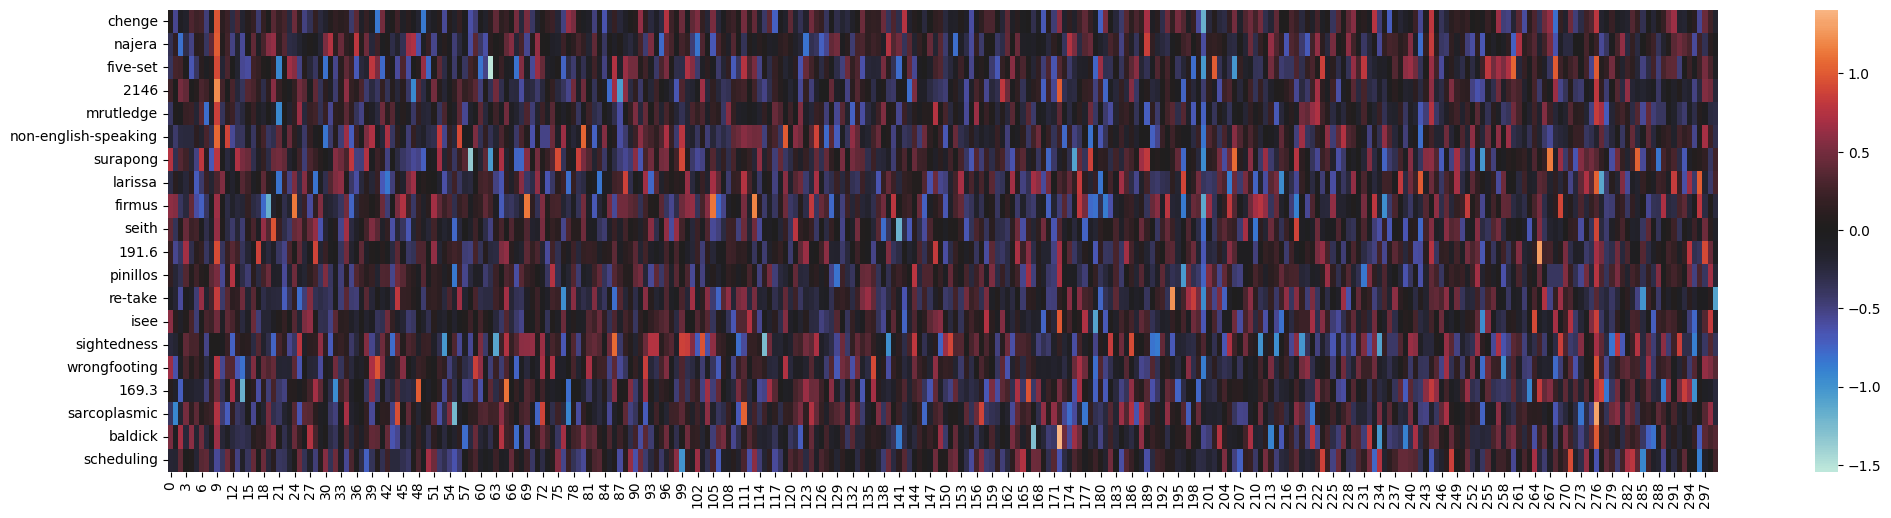

In [11]:
# Visualización de los vectores de las palabas elegidas
fig = plt.figure(figsize=(25, 6))
ax = sns.heatmap(X.sample(20), center=0)

Vamos a chequear si una palabra aparece en el modelo:

In [12]:
word = "embeddings"
try:
    word_vector = model[word]
    print(f"La palabra '{word}' aparece en el modelo")
except KeyError:
    print(f"La palabra '{word}' no aparece en este modelo")

La palabra 'embeddings' aparece en el modelo


In [13]:
word = "Bourbaki"
try:
    word_vector = model[word]
    print(f"La palabra '{word}' aparece en el modelo")
except KeyError:
    print(f"La palabra '{word}' no aparece en este modelo")

La palabra 'Bourbaki' no aparece en este modelo


Veamos la similutud entre dos palabras:

Vamos a imprimir un top 5 de similitudes:

In [14]:
print(model.most_similar(positive=["computer"], topn=5))

[('computers', 0.8248152732849121), ('software', 0.7334420084953308), ('pc', 0.6240139603614807), ('technology', 0.6198545098304749), ('computing', 0.6178765296936035)]


Veamos otras similitudes:

In [15]:
model.similarity("king", "queen")


0.6336469

In [16]:
model.similarity("king", "man")

0.33313724

In [17]:
model.similarity("king", "potato")

0.12202809

In [18]:
model.similarity("king", "king")

1.0

Vamos a imprimir un top 5 para el par rey-reina:

In [19]:
model.most_similar(["king", "queen"], topn=5)

[('monarch', 0.6480432748794556),
 ('prince', 0.6121769547462463),
 ('elizabeth', 0.5973594784736633),
 ('princess', 0.594935417175293),
 ('throne', 0.5921548008918762)]

Vamos a imprimir un top 5 para el par tomate-zanahoria

In [20]:
model.most_similar(["tomato", "carrot"], topn=5)

[('onion', 0.7208420038223267),
 ('carrots', 0.6934049725532532),
 ('cucumber', 0.6927439570426941),
 ('celery', 0.6803164482116699),
 ('garlic', 0.653205931186676)]

Pero incluso puedes hacer cosas interesantes como ver qué palabra no corresponde a una lista.

In [21]:
model.doesnt_match(["summer", "fall", "spring", "air"])

'air'

Hagamos un ranking de las siguientes 15 palabras según su similitud con las palabras “man” y “woman”. Para cada par, veamos su similitud.

In [22]:
words = [
"wife",
"husband",
"child",
"queen",
"king",
"man",
"woman",
"birth",
"doctor",
"nurse",
"teacher",
"professor",
"engineer",
"scientist",
"president"]

In [23]:
for word in words:
    print(f"{word}: {model.similarity('man', word)}")

wife: 0.4170531630516052
husband: 0.4309835731983185
child: 0.37217551469802856
queen: 0.22408132255077362
king: 0.33313724398612976
man: 1.0000001192092896
woman: 0.6998662948608398
birth: 0.24757003784179688
doctor: 0.4012426435947418
nurse: 0.237300306558609
teacher: 0.30423852801322937
professor: 0.20771588385105133
engineer: 0.28749069571495056
scientist: 0.2852986752986908
president: 0.23620198667049408


In [24]:
for word in words:
    print(f"{word}: {model.similarity('woman', word)}")

wife: 0.5986992716789246
husband: 0.5462620258331299
child: 0.5336180925369263
queen: 0.3786052465438843
king: 0.22219783067703247
man: 0.6998662948608398
woman: 0.9999999403953552
birth: 0.4110337495803833
doctor: 0.46908095479011536
nurse: 0.44963565468788147
teacher: 0.42721056938171387
professor: 0.2204643189907074
engineer: 0.20360063016414642
scientist: 0.27530816197395325
president: 0.20134904980659485


¿Nuestro subespacio vectorial de palabras tiene propiedades aritméticas?

Podemos resolver analogías como “A es a B como C es a _” haciendo C + B - A.

 Veamos el siguiente ejemplo famoso :

In [25]:
# man is to woman as king is to ___?
model.most_similar(positive=["king", "woman"], negative=["man"], topn=1)

[('queen', 0.6713277101516724)]

En este ejemplo la propiedad aritmética es la realeza

Veamos otro:

In [36]:
#brazil is to america as italy is to ___?
model.most_similar(positive=["italy", "america"], negative=['brazil'], topn=1)

[('europe', 0.5533686280250549)]

### Visualización de los encajes

Los encajes realizados por el modelo pueden visualizarse reduciendo la dimensionalidad de las palabras a 2 dimensiones mediante tSNE (o algun otro método como PCA).

Las visualizaciones pueden utilizarse para detectar tendencias semánticas y sintácticas en los datos.

Por ejemplo:

* **Semántica:** palabras como gato, perro, vaca, etc. tienden a estar cerca.

* **Sintácticas:** palabras como correr, corriendo o cortar, cortando están muy juntas.

In [73]:
words = ['zombie', 'zombies', 'creature', 'creatures', 'monster', 'monsters', 'vampire', 'dragon', 'body', 'bodies', 'soldier', 'soldiers', 'man', 'men', 'woman', 'women']
vectors = np.array([model[word] for word in words if word in model])

In [74]:
tsne = TSNE(n_components=2, perplexity=1)
vectors_reduced = tsne.fit_transform(vectors)

In [75]:
# Define connections
connections = [
    ('zombies', 'zombie'), ('zombie', 'creatures'), ('creatures', 'body'), 
    ('body', 'monsters'), ('monsters', 'vampires'), ('vampires', 'creature'), 
    ('creature', 'monster'), ('monster', 'vampire'), ('vampire', 'dragon'), 
    ('soldiers', 'bodies'), ('bodies', 'soldier'), ('soldier', 'women'), 
    ('women', 'men'), ('men', 'woman'), ('woman', 'man')
]

In [76]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=vectors_reduced[:, 0],
    y=vectors_reduced[:, 1],
    mode='markers+text',
    text=words,
    marker=dict(size=10, color='LightSkyBlue', line=dict(width=2, color='DarkSlateGrey')),
    textposition="top center"
))

# Optionally, draw lines between related words
lines = [('zombie', 'zombies'), ('creature', 'creatures'), ('monster', 'monsters'), ('man', 'men'), ('woman', 'women'), ('soldier', 'soldiers')]
for line in lines:
    if line[0] in model.key_to_index and line[1] in model.key_to_index:
        idx1, idx2 = words.index(line[0]), words.index(line[1])
        fig.add_trace(go.Scatter(
            x=[vectors_reduced[idx1, 0], vectors_reduced[idx2, 0]],
            y=[vectors_reduced[idx1, 1], vectors_reduced[idx2, 1]],
            mode='lines',
            line=dict(color='black', width=1)
        ))

# Update layout for better visualization
fig.update_layout(
    title='Word Embeddings Visualization',
    xaxis_title='Component 1',
    yaxis_title='Component 2',
    showlegend=False
)

fig.show()

**Memoria**

En su núcleo, los parámetros del modelo word2vec se almacenan como matrices (arreglos NumPy). Cada matriz es **vocabulario** (controlado por el parámetro min_count) veces el tamaño del vector (el parámetro vector_size) de floats (single precision).

En la RAM se guardan tres de estas matrices (se está trabajando para reducir ese número a dos, o incluso a una). Así que si nuestra entrada contiene 100000 palabras únicas, y pedimos que la capa vector_size sea igual a 200, el modelo requerirá aprox. 100.000*200*4*3 bytes = ~229MB.

Se necesita un poco más de memoria para almacenar el árbol del vocabulario (100.000 palabras ocuparían unos pocos megabytes), pero a menos que las palabras sean cadenas extremadamente largas, la huella de memoria estará dominada por las tres matrices anteriores.

Ejercicios:

1) **El modelo Word2Vec es supervisado o no supervisado? Explique**

2) Definición Básica:
¿Qué es Word2Vec y cuál es su propósito principal en procesamiento de lenguaje natural?

3) Arquitecturas:
Explica las dos arquitecturas principales en Word2Vec: Skip-Gram y CBOW. ¿En qué se diferencian y cuándo podrías preferir una sobre la otra?

4) Entrenamiento del Modelo:
Describe brevemente el proceso de entrenamiento de un modelo Word2Vec. ¿Cómo se generan los vectores de palabras durante este proceso?

5) Similitud de Palabras:
¿Cómo se determina la similitud entre palabras utilizando los vectores generados por Word2Vec?

6) Operaciones Vectoriales:
Explica el concepto de operaciones vectoriales en Word2Vec. ¿Por qué la analogía "vector('rey') - vector('hombre') + vector('mujer')" tiene sentido?

7) Tamaño del Vocabulario:
¿Cómo afecta el tamaño del vocabulario al rendimiento y la eficiencia de un modelo Word2Vec?

8) **Overfitting y Underfitting:**
**¿Qué implicaciones podría tener un modelo Word2Vec que esté sobreajustado o subajustado?**

9) Preprocesamiento de Texto:
¿Por qué es importante realizar un preprocesamiento de texto adecuado antes de entrenar un modelo Word2Vec? Menciona al menos dos técnicas comunes de preprocesamiento.

10) Evaluación del Modelo:
¿Cómo podrías evaluar la calidad de los vectores generados por un modelo Word2Vec? Menciona al menos una métrica comúnmente utilizada.

11) **Uso Práctico:**
**De ser posible, entrenar un modelo Word2Vec con un corpus más extenso. Investigar cual podrían usar (Google News, Wikipedia, etc...)**

Referencias:

* Google Code Archive: https://code.google.com/archive/p/word2vec/

* Word Embeddings using Word2Vec: https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/:

* Word2Vec Tutorial: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py

![Colegio Bourbaki](./Images/Matematicas.png)

![Colegio Bourbaki](./Images/Contacto.png)